# XGB model for forecasting % full of caltech
0. imports
1. load data
2. make x, y
3. encode x
4. run model
5. test

In [1]:
import os
os.chdir('..')
os.getcwd()

'/home/denny/Documents/mids/ev_charging'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

from src.data_preprocessing import  datetime_processing, userinput_processing, holiday_processing, create_x, create_wide_y

make data

In [3]:
df_c = pd.read_parquet('data/sessions/caltech/').reset_index(drop=True)
df_c = datetime_processing(df_c)
df_c = userinput_processing(df_c)
df_c = holiday_processing(df_c)

In [4]:
df_c.connectionTime.min()

Timestamp('2018-05-01 13:23:18+0000', tz='UTC')

make x, y

In [5]:
X = create_x(df_c, start_date='2018-05-01', end_date='2021-09-14')
y = create_wide_y(df_c, start_date='2018-05-01', end_date='2021-09-14')
max_spots = len(y.columns)
y = y.sum(axis=1)/max_spots # scales to percent available [0,1]

XGBoost regressor

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

regression_model = Pipeline([
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')),
    ('xgb', XGBRegressor()),
])

regression_model.fit(X_train, y_train)

print(f'training loss: {regression_model.score(X_train, y_train)}\ntest loss    : {regression_model.score(X_test, y_test)}')


training loss: 0.3662071003318125
test loss    : 0.29769829423017435


Text(0, 0.5, '% available')

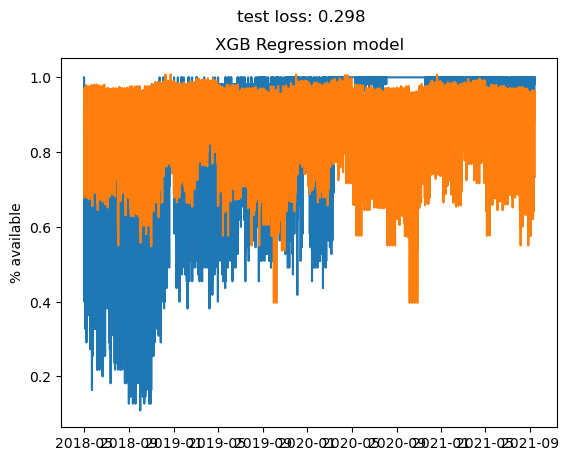

In [7]:
X_test = X_test.sort_index()
y_test = y_test.sort_index()
pred = pd.Series(regression_model.predict(X_test), index=X_test.index)
plt.title('XGB Regression model')
plt.suptitle(f'test loss: {np.round(regression_model.score(X_test, y_test),3)}')
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, pred)
plt.ylabel('% available')

plot

In [8]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

regression_model = Pipeline([
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')),
    ('xgb', LinearRegression()),
])

regression_model.fit(X_train, y_train)
print(f'training loss: {regression_model.score(X_train, y_train)}\ntest loss    : {regression_model.score(X_test, y_test)}')

training loss: 0.27474729721968116
test loss    : 0.27526154554184423


In [9]:
X_test = X_test.sort_index()
y_test = y_test.sort_index()
pred_labels = pd.Series(regression_model.predict(X_test), index=X_test.index)

Text(0, 0.5, '% available')

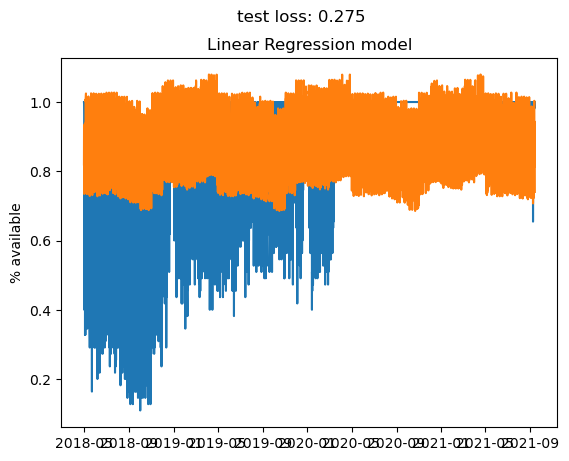

In [10]:
plt.title('Linear Regression model')
plt.suptitle(f'test loss: {np.round(regression_model.score(X_test, y_test),3)}')
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, pred_labels)
plt.ylabel('% available')

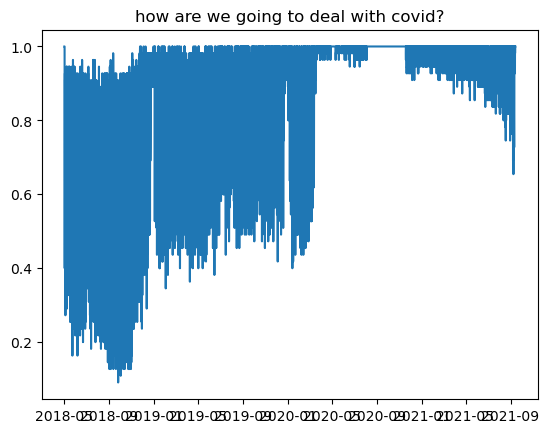

In [11]:
plt.title('how are we going to deal with covid?')
plt.plot(y.sort_index())